In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.columns
#samples_abs_df['mass']

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

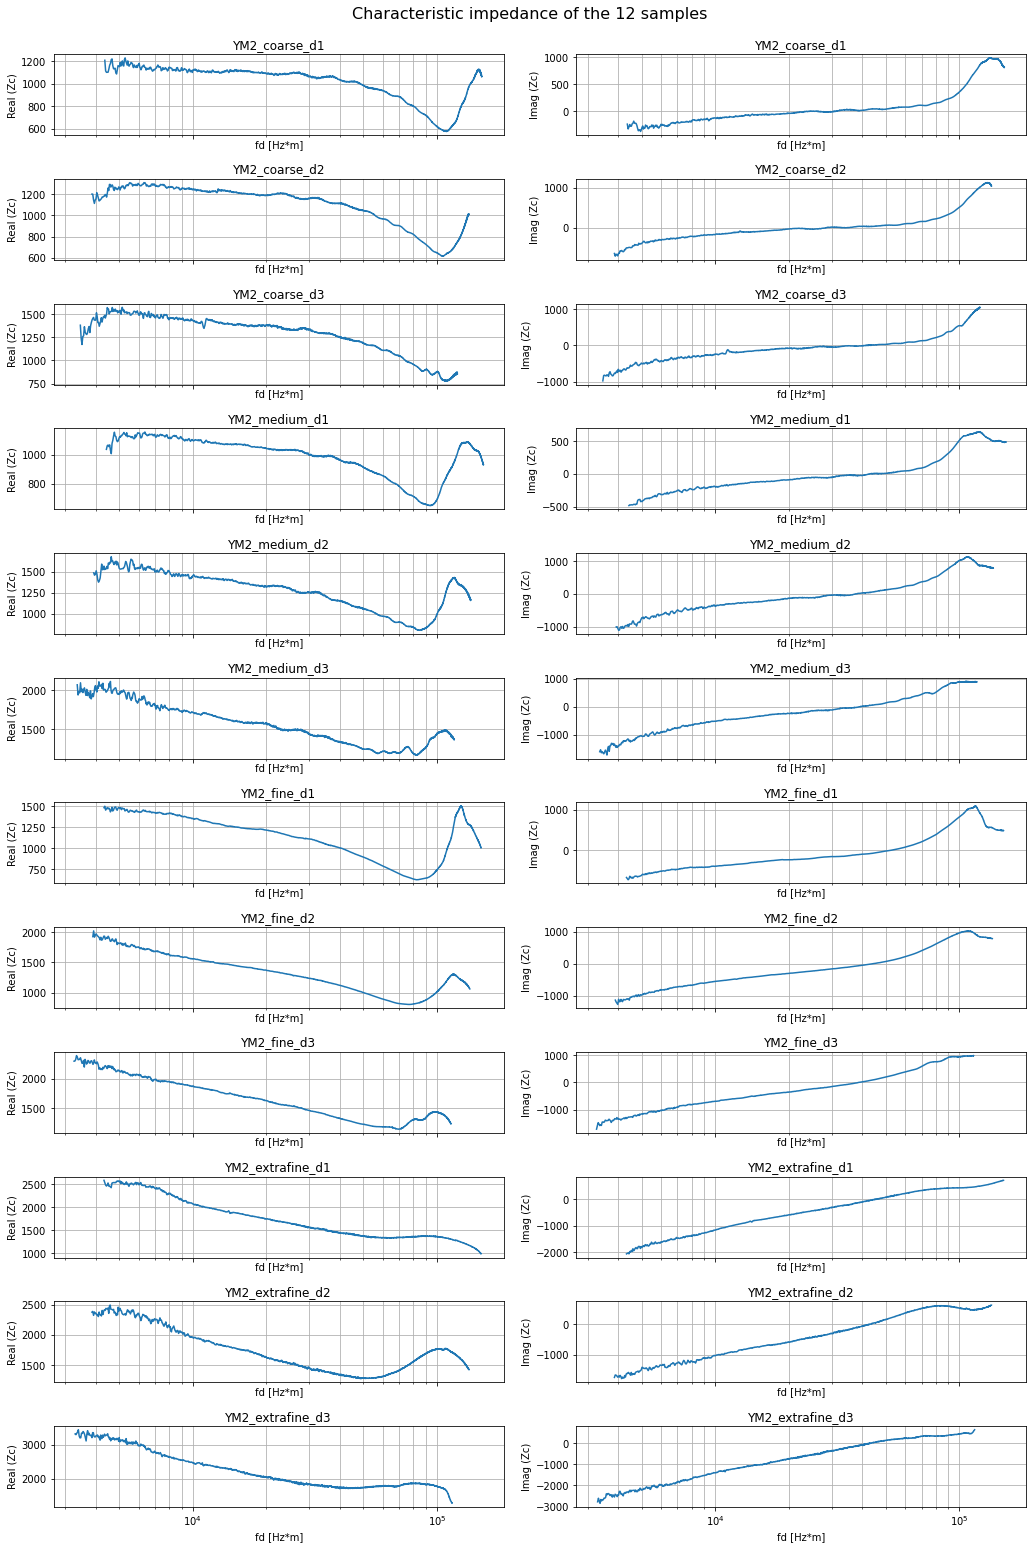

In [2]:
ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

#Characteristic Impedance

for i in range(0, nrows*ncols):
    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
   
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(fd, realz_avgdata)      #Plot over frequency*thickness
    #ax[i][0].semilogx(fd, realz_avgdata)      #Plot over frequency
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (Zc)')
    ax[i][0].grid(which='both')


    ax[i][1].semilogx(fd, imagz_avgdata)      #Plot over frequency*thickness
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (Zc)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Characteristic impedance of the 12 samples',fontsize=16)
plt.show()

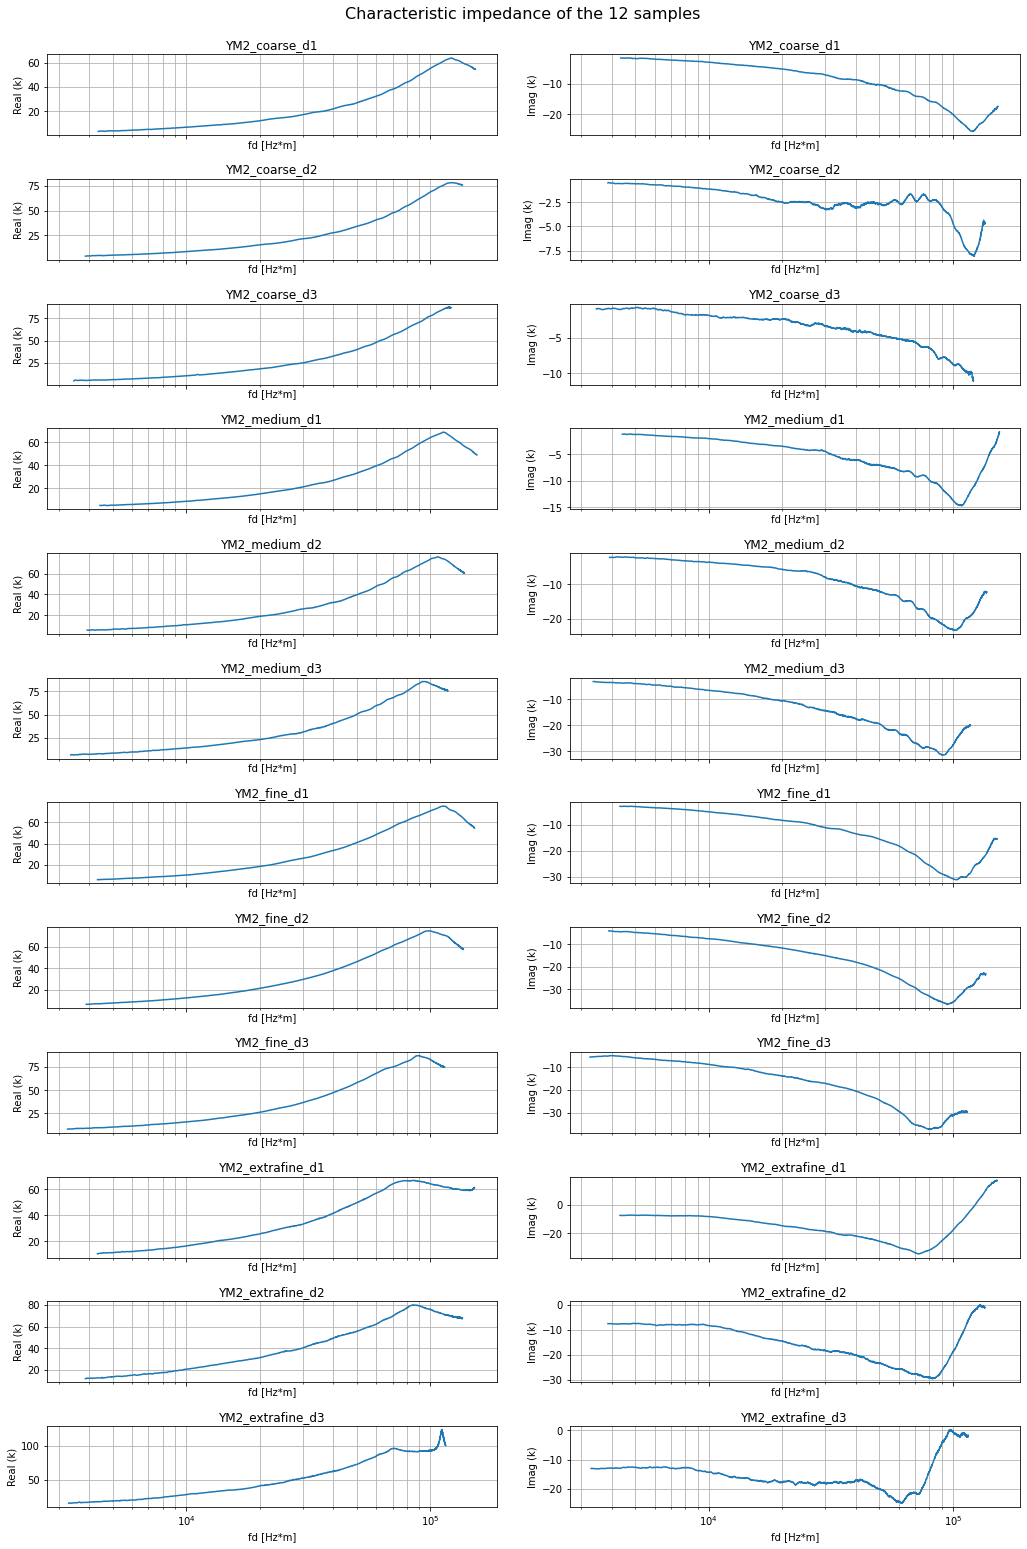

In [3]:
fig, ax = plt.subplots(nrows*ncols, 2, figsize=(15,22), squeeze=False, sharex=True)
#ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

#Characteristic Impedance

for i in range(0, nrows*ncols):
    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real Zc
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    ax[i][0].semilogx(fd, realk_avgdata)      #Plot over frequency*thickness
    #ax[i][0].semilogx(freq, realk_avgdata)      #Plot over frequency
    ax[i][0].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][0].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][0].set_ylabel('Real (k)')
    ax[i][0].grid(which='both')


    ax[i][1].semilogx(fd, imagk_avgdata)      #Plot over frequency*thickness
    #ax[i][1].semilogx(freq, imagk_avgdata)      #Plot over frequency
    ax[i][1].set_title(f'{sample_name}')
    #ax[i].set_xlabel('Frequency [Hz]')
    ax[i][1].set_xlabel('fd [Hz*m]')
    #ax[i].set_ylim([0, 1.1])
    ax[i][1].set_ylabel('Imag (k)')
    ax[i][1].grid(which='both')
fig.subplots_adjust(top=0.95)
fig.suptitle('Characteristic impedance of the 12 samples',fontsize=16)
plt.show()